In [127]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset
import scipy.stats as st
import ast


In [128]:
# Function to load a cleaned dataset from a pickle (.pkl) file
# Input: path (str) - file path to the pickle file
# Output: pandas DataFrame containing the loaded data

def load_data(path):
    
    """
    Loads a cleaned dataset from a pickle file.

    Parameters:
    path (str): Path to the .pkl file.

    Returns:
    pd.DataFrame: Loaded dataset as a pandas DataFrame.
    """
    return pd.read_pickle(path)




In [129]:
# Checking the working directory

import os

print(os.getcwd())

c:\Users\lisad\OneDrive\US_Data_Job_Listing_2022_to_2025


In [130]:
# Downloading the Pickle version cleanned dataset

df = load_data(r'c:\Users\lisad\OneDrive\US_Data_Job_Listing_2022_to_2025\df_clean.pkl')

In [131]:
# Create a copy of the original DataFrame for analysis purposes

df_copy = df.copy()

In [132]:
# Display summary information of the DataFrame df_copy

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61953 entries, 0 to 61952
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           61953 non-null  int64         
 1   index                61953 non-null  int64         
 2   title                61953 non-null  object        
 3   company_name         61953 non-null  object        
 4   location             61916 non-null  object        
 5   via                  61944 non-null  object        
 6   description          61953 non-null  object        
 7   extensions           61953 non-null  object        
 8   job_id               61953 non-null  object        
 9   thumbnail            38194 non-null  object        
 10  posted_at            61763 non-null  object        
 11  schedule_type        61707 non-null  object        
 12  work_from_home       27980 non-null  object        
 13  salary               10088 non-

# U.S. Data Job Listings EDA (2022)

This exploratory analysis examines job postings related to data roles in the U.S. during 2022. The focus is on positions labeled as Analyst, Data Engineer, and Data Scientist. I will be exploring their frequency, salary trends, and distribution across job platforms.


In [133]:
# Filter df_copy DataFrame to include only data for the year 2022

df_2022 = df_copy[df_copy['year'] == 2022].copy()

In [82]:
# Displaying column names from the filtered df_2022 for analysis

df_2022.columns

Index(['Unnamed: 0', 'index', 'title', 'company_name', 'location', 'via',
       'description', 'extensions', 'job_id', 'thumbnail', 'posted_at',
       'schedule_type', 'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens', 'date',
       'year', 'month', 'job_skills', 'remote_work', 'clean_title',
       'seniority_level', 'employment_type', 'website'],
      dtype='object')

In [83]:
# Display summary information of df_2022

df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5488 entries, 39058 to 61951
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           5488 non-null   int64         
 1   index                5488 non-null   int64         
 2   title                5488 non-null   object        
 3   company_name         5488 non-null   object        
 4   location             5483 non-null   object        
 5   via                  5488 non-null   object        
 6   description          5488 non-null   object        
 7   extensions           5488 non-null   object        
 8   job_id               5488 non-null   object        
 9   thumbnail            3031 non-null   object        
 10  posted_at            5488 non-null   object        
 11  schedule_type        5466 non-null   object        
 12  work_from_home       2725 non-null   object        
 13  salary               987 non-null

In [84]:
# Verifying the descriptive statistics for df_2022 columns

df_2022.describe()

,Unnamed: 0,index,date_time,commute_time,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,year,month
count,5488.000000,5488.000000,5488,0.0,987.000000,916.000000,916.000000,606.000000,377.000000,987.000000,5488.0,5488.000000
mean,50266.338739,1056.330904,2022-12-03 11:35:26.836915712,NaN,40557.162036,33631.937445,48844.617293,46.875536,106040.125610,100664.056084,2022.0,11.606596
min,39058.000000,0.000000,2022-11-04 03:40:11.151943,NaN,10.000000,8.000000,12.000000,10.000000,42500.000000,20800.000000,2022.0,11.000000
25%,43706.750000,535.750000,2022-11-16 04:00:24.047298048,NaN,38.000000,30.000000,50.000000,31.000000,85050.000000,69680.000000,2022.0,11.000000
50%,52228.500000,1021.500000,2022-12-08 04:00:18.460689664,NaN,65.000000,55.000000,75.000000,45.000000,103781.000000,100000.000000,2022.0,12.000000
75%,56479.250000,1562.250000,2022-12-19 04:00:25.544441088,NaN,92487.750000,76798.000000,110000.000000,57.500000,122470.500000,122470.500000,2022.0,12.000000
max,61951.000000,2625.000000,2022-12-31 04:00:31.846389,NaN,217500.000000,185000.000000,260000.000000,135.000000,217500.000000,280800.000000,2022.0,12.000000
std,7024.225460,624.561202,NaN,NaN,54898.705563,45477.361595,66027.094002,22.070814,30763.210293,40930.019377,0.0,0.488550


In [65]:
# Record keeping for filtered data from df_copy Data Frame

print(f'Filtered {len(df_2022):,} job postings for year 2022')

Filtered 5,488 job postings for year 2022


In [66]:
# Check Data Frame df_2022's filtered data validation

assert df_2022['year'].nunique() == 1 and df_2022['year'].iloc[0] == 2022

In [67]:
# Log shape changes between df_copy and df_2022 Data Frames

print(f'Original: {df_copy.shape[0]:,} rows -> 2022 subset: {df_2022.shape[0]:,} rows')

Original: 61,953 rows -> 2022 subset: 5,488 rows


## Dataset Overview

This dataset has been filtered to include only job postings from 2022. It contains cleaned data on job titles, salary information, locations, employment types, remote work options, and platforms (websites). Below is a breakdown of key metadata and the preparatory steps taken before analysis.

In [134]:
# Select and reorder relevant columns for analysis and reset index for clarity

df_2022 = df_2022[[
'date_time','date', 'year', 'month',
'company_name', 'location','website',
'employment_type','remote_work', 
'seniority_level','clean_title',
'salary_standardized','salary_hourly', 
'salary_yearly', 'job_skills'
]].reset_index(drop=True)

In [17]:
# Assigning the data to a new DataFrame with reset index and renamed columns

df_2022_location = df_2022['location'].value_counts().head(10).reset_index()
df_2022_location.columns = ['location', 'count']

df_2022_location


,location,count
0,Anywhere,2725
1,United States,1050
2,"Kansas City, MO",167
3,"Oklahoma City, OK",120
4,"Jefferson City, MO",109
5,"Columbia, MO",62
6,Missouri,58
7,"Tulsa, OK",52
8,"Bentonville, AR",48
9,"Topeka, KS",44


## Top U.S. Locations for Data Job Listings (2022)

This bar chart displays the U.S. locations with the highest concentration of data job postings in 2023. It provides insights into where data professionals are most in demand across the country.

The data reveals that "Anywhere" and "United States" are the most frequently listed locations, likely representing remote or unspecified postings. Following these, cities such as Kansas City, Oklahoma City and Jefferson City emerge as notable hubs for data job opportunities.

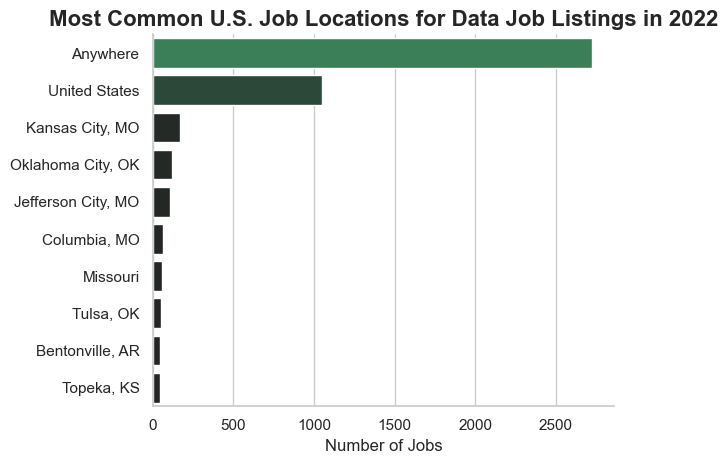

In [18]:
# Top U.S. Locations for data job interest — 2022 job market.



# Define chart style and color palette
sns.set_theme(style='whitegrid')
palette = sns.dark_palette('seagreen',n_colors=5, reverse=False, as_cmap=True)

sns.barplot(data=df_2022_location, x='count', y='location', hue='count', palette=palette, legend=False)
sns.despine()
plt.title('Most Common U.S. Job Locations for Data Job Listings in 2022', fontsize=16, fontweight='bold')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Remote Work & Salary Insights for Analyst Roles (2022)

## Remote Work Options in 2022 Data Job Listings

The pie chart below breaks down the share of jobs offering remote options versus those that did not. This provides a quick glance into how flexible data roles were in 2022.


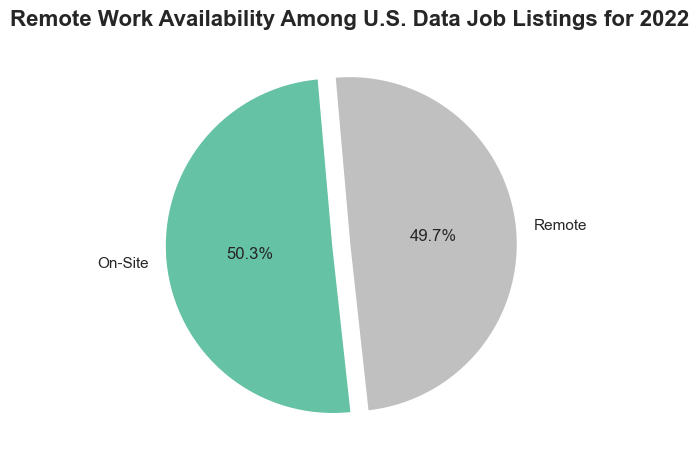

In [19]:
# Pie Chart: 2022 U.S. Data Job Listings with Remote Work Availability

# Count remote work availability categories
df_2022_pie_plot = df_2022['remote_work'].value_counts()

# Modify labels for clarity and extract slice sizes from data
labels = ['On-Site', 'Remote']
sizes = df_2022_pie_plot.values.tolist()

# Set colors to match labels
colours = ['#66c2a5', 'silver']  # Remote = greenish, On-Site = silver

# Explode the first slice to emphasize it
explode = [0.1] + [0] * (len(labels) - 1)

# Plot the pie chart
df_2022_pie_plot.plot(
    kind='pie',
    labels=labels,
    startangle=95,
    autopct='%1.1f%%',
    colors=colours,
    explode=explode,
    pctdistance=0.50
)

# Add title and formatting
plt.title('Remote Work Availability Among U.S. Data Job Listings for 2022', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()


## Analyst Roles: Remote vs. Onsite Jobs with Salary Insights (2022)

This analysis explores how remote work flexibility correlates with median salaries for analyst roles in 2022. The horizontal bar chart below compares the median salaries between remote and onsite positions across various seniority levels.

In [20]:
# Filter analyst roles with salary data and remote work options

df_2022_analyst_remote_option = df_2022[df_2022['clean_title'].str.contains('analyst', case=False, na=False)
                                        & df_2022['salary_yearly'].notna()
                                        & df_2022['remote_work'].notna()
                                        & df_2022['seniority_level'].notna()
                                        ].copy()

df_2022_analyst_remote_option.sample(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
5487,2022-12-08 04:00:15.975728,2022-12-08,2022,12,EDWARD JONES,"Calhoun, MO",my arklamiss jobs,Full-Time,False,Lead,Data Analyst,144481.5,NaN,144481.5,[]
866,2022-11-05 05:00:09.387558,2022-11-05,2022,11,EDWARD JONES,"Devils Elbow, MO",wjhl jobs,Full-Time,False,,Data Analyst,103781.0,NaN,103781.0,"[power_bi, excel, sas, snowflake, sql, spss, r..."
5006,2022-11-15 04:00:25.564184,2022-11-15,2022,11,EDWARD JONES,"Jefferson City, MO",wane jobs,Full-Time,False,Lead,Data Analyst,144481.5,NaN,144481.5,[]
684,2022-11-23 04:00:15.434651,2022-11-23,2022,11,Edward Jones,"Warrensburg, MO",JobServe,Full-Time,False,Senior,Marketing Analyst,122470.5,NaN,122470.5,"[tableau, excel, sas, hadoop, power_bi, pl/sql..."
3008,2022-12-15 04:00:09.995915,2022-12-15,2022,12,Insight Global,Anywhere,linkedin,Full-Time,True,,Data Analyst,107500.0,NaN,107500.0,"[r, python, sas, sql]"


In [21]:
# Clean 'seniority_level' by stripping whitespace and replacing empty strings with NaN

df_2022_analyst_remote_option['seniority_level'] = (
    df_2022_analyst_remote_option['seniority_level']
    .str.strip()  
    .replace('', np.nan)  #Treat empty strings as NaN values
)

In [22]:
# Count the occurrences of each remote work option

analyst_remote_count_2022 = df_2022_analyst_remote_option['remote_work'].value_counts().reset_index()
analyst_remote_count_2022

,remote_work,count
0,False,214
1,True,138


In [23]:
# Calculate the median salary for each combination of remote work and seniority level

analyst_median_salary_2022 = df_2022_analyst_remote_option.groupby(
    ['remote_work', 'seniority_level']
)['salary_yearly'].median().reset_index()
analyst_median_salary_2022

,remote_work,seniority_level,salary_yearly
0,False,Junior,64635.8375
1,False,Lead,144481.5000
2,False,Manager,90000.0000
3,False,Principal,79809.0850
4,False,Senior,110000.0000
5,True,Junior,75000.0000
6,True,Lead,130000.0000
7,True,Manager,134000.0000
8,True,Principal,156075.0000
9,True,Senior,114000.0000


In [24]:
# Merge the remote work counts with the median salary data

analyst_median_salary_2022 = pd.merge(analyst_remote_count_2022, analyst_median_salary_2022, on='remote_work')
analyst_median_salary_2022

,remote_work,count,seniority_level,salary_yearly
0,False,214,Junior,64635.8375
1,False,214,Lead,144481.5000
2,False,214,Manager,90000.0000
3,False,214,Principal,79809.0850
4,False,214,Senior,110000.0000
5,True,138,Junior,75000.0000
6,True,138,Lead,130000.0000
7,True,138,Manager,134000.0000
8,True,138,Principal,156075.0000
9,True,138,Senior,114000.0000


In [25]:
# Rename the 'salary_standardized' column to 'median_salary' for clarity

analyst_median_salary_2022 = analyst_median_salary_2022.rename(columns={'salary_yearly' : 'median_salary'})

# Display the final DataFrame containing remote work counts and median salaries

analyst_median_salary_2022

,remote_work,count,seniority_level,median_salary
0,False,214,Junior,64635.8375
1,False,214,Lead,144481.5000
2,False,214,Manager,90000.0000
3,False,214,Principal,79809.0850
4,False,214,Senior,110000.0000
5,True,138,Junior,75000.0000
6,True,138,Lead,130000.0000
7,True,138,Manager,134000.0000
8,True,138,Principal,156075.0000
9,True,138,Senior,114000.0000


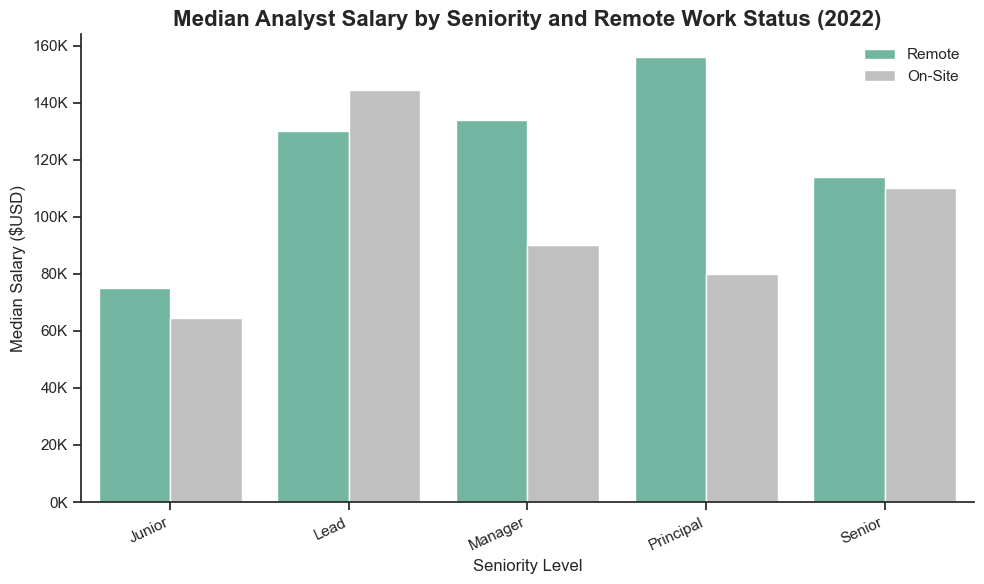

Text(0.5, -0.08, '*Note: Analyst roles with missing seniority information were excluded.This likely biased results toward senior-level, remote-friendly roles,inflating salaries in the remote category.')

<Figure size 640x480 with 0 Axes>

In [26]:
# Median Salary by Remote Work Status (2022 Analyst Job Posting Roles)

# Map remote_work boolean to readable labels
label_map = {True: 'Remote', False: 'On-Site'}
analyst_median_salary_2022['remote_label'] = analyst_median_salary_2022['remote_work'].map(label_map)

# Set theme
sns.set_theme(style='ticks')
plt.figure(figsize=(10, 6))

# Plot bar chart using mapped labels and fixed hue order
ax = sns.barplot(
    data=analyst_median_salary_2022,
    x='seniority_level',
    y='median_salary',
    hue='remote_label',
    hue_order=['Remote', 'On-Site'],  # Enforce order
    palette=['#66c2a5', 'silver']   # Remote = greenish, No Remote = silver
)

# Add labels and formatting
plt.title('Median Analyst Salary by Seniority and Remote Work Status (2022)', fontsize=16, fontweight='bold')
plt.xlabel('Seniority Level')
plt.ylabel('Median Salary ($USD)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y / 1000)}K'))
plt.xticks(rotation=25, horizontalalignment='right')
sns.despine()
plt.legend(frameon=False, loc='upper right') # Format legend for better visibility
plt.tight_layout()
plt.show()

# Add footnote below chart
plt.figtext(
    0.5, -0.08,
    '*Note: Analyst roles with missing seniority information were excluded.'
    'This likely biased results toward senior-level, remote-friendly roles,'
    'inflating salaries in the remote category.',
    wrap=True, ha='center', fontsize=9, style='italic'
)


## Employment Types for Data Roles in 2022

Full-time, part-time, contract, and other work arrangements are shown in this chart. Understanding employment types helps identify how data jobs were structured.

In [27]:
# Prepare top 10 employment type offerrings by U.S. job platforms in 2022

df_2022_schedule = df_2022['employment_type'].value_counts().head(5).reset_index()
df_2022_schedule.columns = ['employment_type', 'count']
df_2022_schedule


,employment_type,count
0,Full-Time,3973
1,Contract,1378
2,Internship,58
3,Part-Time,57
4,Other,22


## Employment Types for Data Roles (2022)

The chart below illustrates the distribution of employment types—such as full-time, part-time, contract, and other work arrangements—among data roles in 2022. Understanding these employment structures provides valuable insights into how data positions are organized and the flexibility they offer.

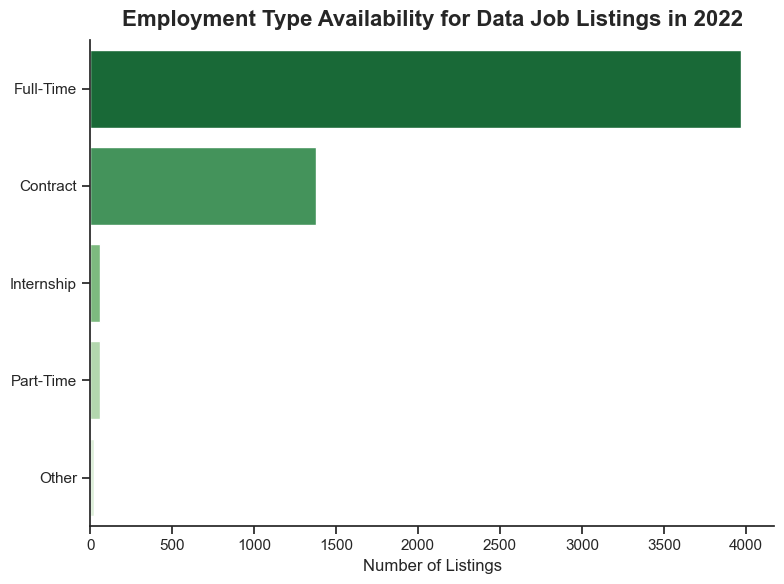

In [28]:
# Visualizing Employment Type Availability in 2022 U.S. Data Job Postings

# Define graph theme and color palette 
sns.set_theme(style='ticks')
palette = sns.color_palette('Greens', n_colors=5)


plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_2022_schedule,
    x='count',
    y='employment_type',
    hue='count',
    palette=palette,
    legend=False
)

# Despine graph and set title and labels
sns.despine()
plt.title('Employment Type Availability for Data Job Listings in 2022', 
          fontsize=16, fontweight='bold', pad=10)
plt.xlabel('Number of Listings')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Where Analyst Jobs Were Posted Most Often (2022)

This section identifies the top websites where analyst roles were posted in 2022. It also compares the posting volume and median salary per site.

In [29]:
df_2022.columns

Index(['date_time', 'date', 'year', 'month', 'company_name', 'location',
       'website', 'employment_type', 'remote_work', 'seniority_level',
       'clean_title', 'salary_standardized', 'salary_hourly', 'salary_yearly',
       'job_skills'],
      dtype='object')

In [86]:
# Filter the 2022 dataset to include only 'analyst' roles with salary and website information


df_2022_DA = df_2022[df_2022['clean_title'].str.contains('analyst', case=False, na=False)
                     & df_2022['salary_yearly'].notna()
                     & df_2022['website'].notna()
                     ].copy()
df_2022_DA.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
14,2022-12-29 00:19:20.229733,2022-12-29,2022,12,"Acadia Technologies, Inc.",United States,dice,Full-Time,False,,Data Analyst,70000.0,NaN,70000.0,"[ssis, sql]"
15,2022-11-09 04:00:16.330489,2022-11-09,2022,11,rays technologies,United States,fox4kc jobs,Full-Time,False,,Data Analyst,95000.0,NaN,95000.0,"[hadoop, aws, postgresql, sharepoint]"
16,2022-11-22 04:00:11.811065,2022-11-22,2022,11,EDWARD JONES,"Chamois, MO",wdhn jobs,Full-Time,False,,Data Analyst,103781.0,NaN,103781.0,"[power_bi, excel, sas, snowflake, sql, spss, r..."
17,2022-11-22 04:00:16.103200,2022-11-22,2022,11,EDWARD JONES,"Nixa, MO",wtrf jobs,Full-Time,False,Senior,Marketing Analyst,122470.5,NaN,122470.5,"[tableau, excel, sas, hadoop, power_bi, pl/sql..."
84,2022-12-21 04:00:21.181553,2022-12-21,2022,12,Jobot,"Stillwater, OK",dice,Full-Time,False,,Data Analyst,65000.0,NaN,65000.0,[]


In [87]:
# Display summary information of df_2022_DA

df_2022_DA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 352 entries, 14 to 5487
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            352 non-null    datetime64[ns]
 1   date                 352 non-null    object        
 2   year                 352 non-null    int32         
 3   month                352 non-null    int32         
 4   company_name         352 non-null    object        
 5   location             352 non-null    object        
 6   website              352 non-null    object        
 7   employment_type      352 non-null    object        
 8   remote_work          352 non-null    bool          
 9   seniority_level      352 non-null    object        
 10  clean_title          352 non-null    object        
 11  salary_standardized  352 non-null    float64       
 12  salary_hourly        0 non-null      float64       
 13  salary_yearly        352 non-null    f

In [88]:
# Inspecting the descriptive statistics for df_2022_DA DataFrame

df_2022_DA.describe()

,date_time,year,month,salary_standardized,salary_hourly,salary_yearly
count,352,352.0,352.000000,352.000000,0.0,352.000000
mean,2022-11-30 14:38:41.229482496,2022.0,11.488636,103348.045781,NaN,103348.045781
min,2022-11-04 03:40:11.151943,2022.0,11.000000,42500.000000,NaN,42500.000000
25%,2022-11-15 04:00:30.796655872,2022.0,11.000000,82500.000000,NaN,82500.000000
50%,2022-11-23 16:00:18.041632512,2022.0,11.000000,103781.000000,NaN,103781.000000
75%,2022-12-17 04:00:08.256869888,2022.0,12.000000,122155.125000,NaN,122155.125000
max,2022-12-31 04:00:30.157459,2022.0,12.000000,187000.000000,NaN,187000.000000
std,NaN,0.0,0.500582,27701.275635,NaN,27701.275635


In [135]:
# Count the occurrences of each website and select the top 5

website_count_DA_2022 = df_2022_DA['website'].value_counts().head(10).reset_index()
website_count_DA_2022

,website,count
0,linkedin,100
1,indeed,59
2,my arklamiss jobs,32
3,wane jobs,18
4,built in,17
5,wreg jobs,15
6,big country jobs,15
7,The Ladders,9
8,JobServe,7
9,vacancies for stevenage fans,6


In [136]:
# Calculate the median salary for each website

DA_median_2022_salary = df_2022_DA.groupby('website')['salary_yearly'].median().reset_index()
DA_median_2022_salary.head(5)

,website,salary_yearly
0,JobServe,103781.0
1,Recruiter.com,100000.0
2,The Ladders,115000.0
3,adzuna,72500.0
4,aijobs.net,65879.5


In [137]:
# Merge the website count and median salary data into a single DataFrame

DA_top_website_with_2022_salary = pd.merge(website_count_DA_2022, DA_median_2022_salary, on='website')

In [138]:
# Rename columns for clarity

DA_top_website_with_2022_salary = DA_top_website_with_2022_salary.rename(columns={'salary_yearly': 'median_salary',
                                                                                  'count' : 'post_count'
                                                                        })
# Display the resulting DataFrame

DA_top_website_with_2022_salary

,website,post_count,median_salary
0,linkedin,100,96700.5525
1,indeed,59,80000.0000
2,my arklamiss jobs,32,103781.0000
3,wane jobs,18,103781.0000
4,built in,17,122050.0000
5,wreg jobs,15,115000.0000
6,big country jobs,15,103781.0000
7,The Ladders,9,115000.0000
8,JobServe,7,103781.0000
9,vacancies for stevenage fans,6,103781.0000


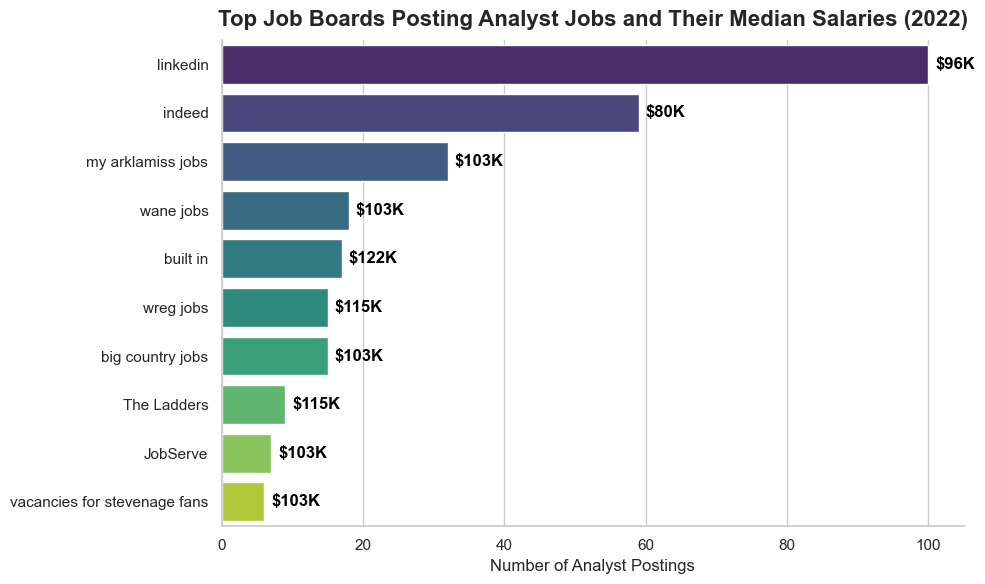

In [139]:
# Top U.S. Job Sites for Analyst Roles with 2022 Salary Data

# Set chart theme and size
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))

# Create barplot
ax = sns.barplot(
    data=DA_top_website_with_2022_salary,
    x='post_count',
    y='website',
    hue='website',
    palette='viridis'
)

# Title and labels

plt.title('Top Job Boards Posting Analyst Jobs and Their Median Salaries (2022)', fontsize=16, fontweight='bold', pad=10)
plt.xlabel('Number of Analyst Postings')
plt.ylabel('')

# Remove spines 
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)

# Annotate with median salaries
for i, (count, salary) in enumerate(zip(
    DA_top_website_with_2022_salary['post_count'],
    DA_top_website_with_2022_salary['median_salary']
)):
    ax.text(
        count + 1,  # offset the text slightly to the right
        i,           # y-coordinate is the index
        f'${int(salary/1000):,}K',  # format salary
        va='center',
        fontsize=12,
        fontweight='semibold',
        color='black'
    )

plt.tight_layout()
plt.show()

## Where Data Engineer and Data Scientist Jobs Were Posted Most Often (2022)

This section identifies the top websites where Data Engineer and Data Scientist roles were posted in 2022. It also compares the posting volume and median salary per site.

In [140]:
# Filter job listing for Data Engineer with valid salary and website info

df_2022_DE = df_2022[df_2022['clean_title'].str.contains('Data Engineer', case=False, na=False)
                     & df_2022['salary_yearly'].notna()
                     & df_2022['website'].notna()
                     ].copy()

In [95]:
df_2022_DE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 273 to 5445
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            11 non-null     datetime64[ns]
 1   date                 11 non-null     object        
 2   year                 11 non-null     int32         
 3   month                11 non-null     int32         
 4   company_name         11 non-null     object        
 5   location             11 non-null     object        
 6   website              11 non-null     object        
 7   employment_type      11 non-null     object        
 8   remote_work          11 non-null     bool          
 9   seniority_level      11 non-null     object        
 10  clean_title          11 non-null     object        
 11  salary_standardized  11 non-null     float64       
 12  salary_hourly        0 non-null      float64       
 13  salary_yearly        11 non-null     f

In [114]:
# Inspecting the descriptive statistics for df_2022_DE DataFrame

df_2022_DE.describe()

,date_time,year,month,salary_standardized,salary_hourly,salary_yearly
count,11,11.0,11.000000,11.000000,0.0,11.000000
mean,2022-12-02 13:23:35.940971776,2022.0,11.636364,136228.363636,NaN,136228.363636
min,2022-11-04 03:40:15.648132,2022.0,11.000000,81450.000000,NaN,81450.000000
25%,2022-11-11 16:00:16.442344960,2022.0,11.000000,96890.500000,NaN,96890.500000
50%,2022-12-04 04:00:19.282995968,2022.0,12.000000,122500.000000,NaN,122500.000000
75%,2022-12-20 16:00:29.522200320,2022.0,12.000000,173500.000000,NaN,173500.000000
max,2022-12-29 04:00:12.263846,2022.0,12.000000,217500.000000,NaN,217500.000000
std,NaN,0.0,0.504525,50703.063786,NaN,50703.063786


In [141]:
# Count number of job listings for Data Enginner per website 

website_count_DE_2022 = df_2022_DE['website'].value_counts().head(5).reset_index()
website_count_DE_2022

,website,count
0,aijobs.net,3
1,linkedin,3
2,my arklamiss jobs,2
3,central illinois proud jobs,1
4,The Ladders,1


In [142]:
# Calculate Data Engineer median salary for each website

DE_median_2022_salary = df_2022_DE.groupby('website')['salary_yearly'].median().reset_index()
DE_median_2022_salary


,website,salary_yearly
0,The Ladders,90000.0
1,aijobs.net,217500.0
2,big country jobs,103781.0
3,central illinois proud jobs,81450.0
4,linkedin,122500.0
5,my arklamiss jobs,114390.5


In [143]:
# Merge the DataFrames on website

DE_top_website_with_2022_salary = pd.merge(website_count_DE_2022, DE_median_2022_salary, on='website')

In [144]:
# Remaning the columns for clarity

DE_top_website_with_2022_salary = DE_top_website_with_2022_salary.rename(columns={'salary_yearly': 'median_salary',
                                                                                  'count' : 'post_count'
                                                                        })

DE_top_website_with_2022_salary

,website,post_count,median_salary
0,aijobs.net,3,217500.0
1,linkedin,3,122500.0
2,my arklamiss jobs,2,114390.5
3,central illinois proud jobs,1,81450.0
4,The Ladders,1,90000.0


In [145]:
# Filter job listing for Data Scientist with valid salary and website info

df_2022_DS = df_2022[df_2022['clean_title'].str.contains('Data Scientist', case=False, na=False)
                     & df_2022['salary_yearly'].notna()
                     & df_2022['website'].notna()
                     ].copy()

In [120]:
df_2022_DS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 342 to 3172
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            14 non-null     datetime64[ns]
 1   date                 14 non-null     object        
 2   year                 14 non-null     int32         
 3   month                14 non-null     int32         
 4   company_name         14 non-null     object        
 5   location             14 non-null     object        
 6   website              14 non-null     object        
 7   employment_type      14 non-null     object        
 8   remote_work          14 non-null     bool          
 9   seniority_level      14 non-null     object        
 10  clean_title          14 non-null     object        
 11  salary_standardized  14 non-null     float64       
 12  salary_hourly        0 non-null      float64       
 13  salary_yearly        14 non-null     f

In [146]:
# Count number of job listings for Data Scientist per website 

website_count_DS_2022 = df_2022_DS['website'].value_counts().head(5).reset_index()
website_count_DS_2022

,website,count
0,aijobs.net,5
1,indeed,3
2,linkedin,3
3,built in la,1
4,jobs for stevenage fans,1


In [147]:
# Calculate Data Scientist median salary for each website

DS_median_2022_salary = df_2022_DS.groupby('website')['salary_yearly'].median().reset_index()
DS_median_2022_salary

,website,salary_yearly
0,aijobs.net,172500.00
1,built in,202500.00
2,built in la,90250.00
3,indeed,134319.62
4,jobs for stevenage fans,95000.00
5,linkedin,135000.00


In [148]:
# Merge the DataFrames on website

DS_top_website_with_2022_salary = pd.merge(website_count_DS_2022, DS_median_2022_salary, on='website')

In [149]:
# Remaning the columns for clarity

DS_top_website_with_2022_salary = DS_top_website_with_2022_salary.rename(columns={'salary_yearly': 'median_salary',
                                                                                  'count' : 'post_count'
                                                                        })

DS_top_website_with_2022_salary

,website,post_count,median_salary
0,aijobs.net,5,172500.00
1,indeed,3,134319.62
2,linkedin,3,135000.00
3,built in la,1,90250.00
4,jobs for stevenage fans,1,95000.00


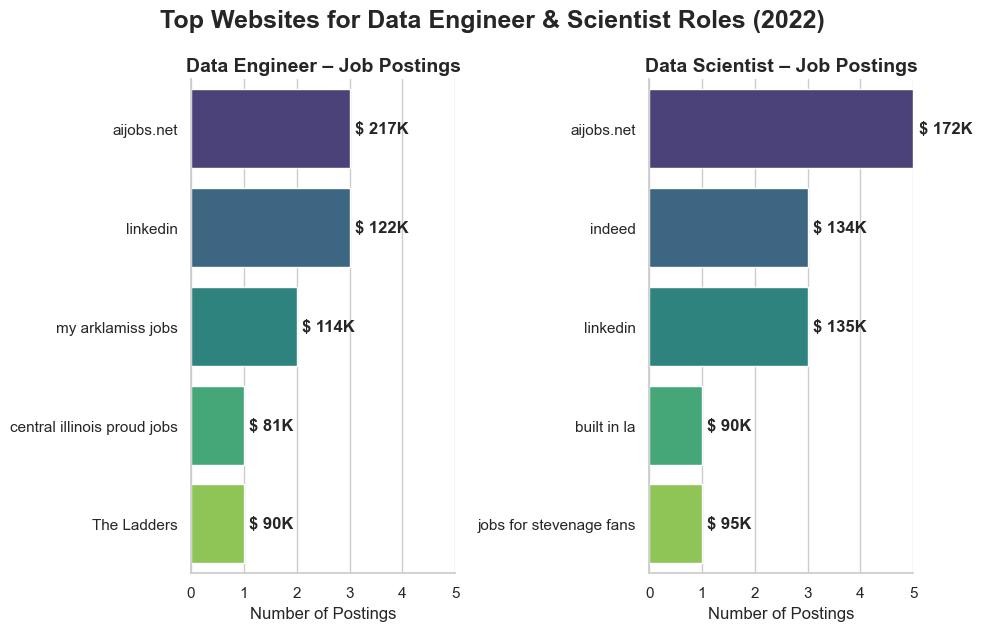

In [150]:
# Top U.S. Job Sites for Data Engineer and Data Scientist Roles with 2022 Salary Data


# Create summary DataFrames for Data Engineer (DE) 
DE_summary = DE_top_website_with_2022_salary.copy()
DE_summary['Role'] = 'Data Engineer'

# Create summary DataFrame for Data Scientist (DS)
DS_summary = DS_top_website_with_2022_salary.copy()
DS_summary['Role'] = 'Data Scientist'

# Combine into one DataFrame
combined_summary = pd.concat([DE_summary, DS_summary])

# Plot subplots and set chart theme
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharex=False)
sns.set_theme(style='whitegrid')


# Remove spines 
sns.despine()

# Annotation of Data Engineer and Data Scientist roles
for ax, role in zip(axes, combined_summary['Role'].unique()):
    subset = combined_summary[combined_summary['Role'] == role]
    sns.barplot(data=subset, x='post_count', y='website', hue='website', ax=ax, palette='viridis')
    ax.set_title(f'{role} – Job Postings', fontsize=14, fontweight='semibold')
    ax.set_xlabel('Number of Postings')
    ax.set_xlim(0, 5)
    ax.set_ylabel('')
    # Annotation Median Salary for Roles
    for i, (count, salary) in enumerate(zip(subset['post_count'], subset['median_salary'])):
        ax.text(count + 0.1, i, f'$ {int(salary/1000):,}K', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.suptitle('Top Websites for Data Engineer & Scientist Roles (2022)', fontsize=18, fontweight='bold', y=1.05)
plt.show()
